# Loan Approval Prediction: 
###Decision Tree, Random Forest, Boosting & Logistic Regression Modeling

Dataset Courtesy: https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset

### Problem Statement:

__Problem__ <br>
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

#### Dataset Description:

| Variable | Description | 
|------|------|
| Loan_ID | Unique Loan ID | 
| Gender | Male/ Female | 
| Married | Applicant married (Y/N) | 
| Dependents | Number of dependents | 
| Education | Applicant Education (Graduate/ Under Graduate) | 
| Self_Employed | Self employed (Y/N) | 
| ApplicantIncome | Applicant income | 
| CoapplicantIncome | Coapplicant income | 
| LoanAmount | Loan amount in thousands | 
| Loan_Amount_Term | Term of loan in months | 
| Credit_History | credit history meets guidelines | 
| Property_Area | Urban/ Semi Urban/ Rural | 
| Loan_Status | Loan approved (Y/N) | 


In [26]:
################### Importing Libraries ######################
import pandas as pd

train_df = pd.read_csv('C:/Users/tanis/OneDrive/Desktop/NYU Courses/Semester 1/ML in Finance/Coding Assignment 2/loan-train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### Observations:
1. We can see there are total 13 columns including target variable, all of them are self explanatory. 
2. We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns 


In [27]:
############ Count number of Categorical and Numerical Columns ######################
train_df = train_df.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)


['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


#### Analyze values assigned to columns 

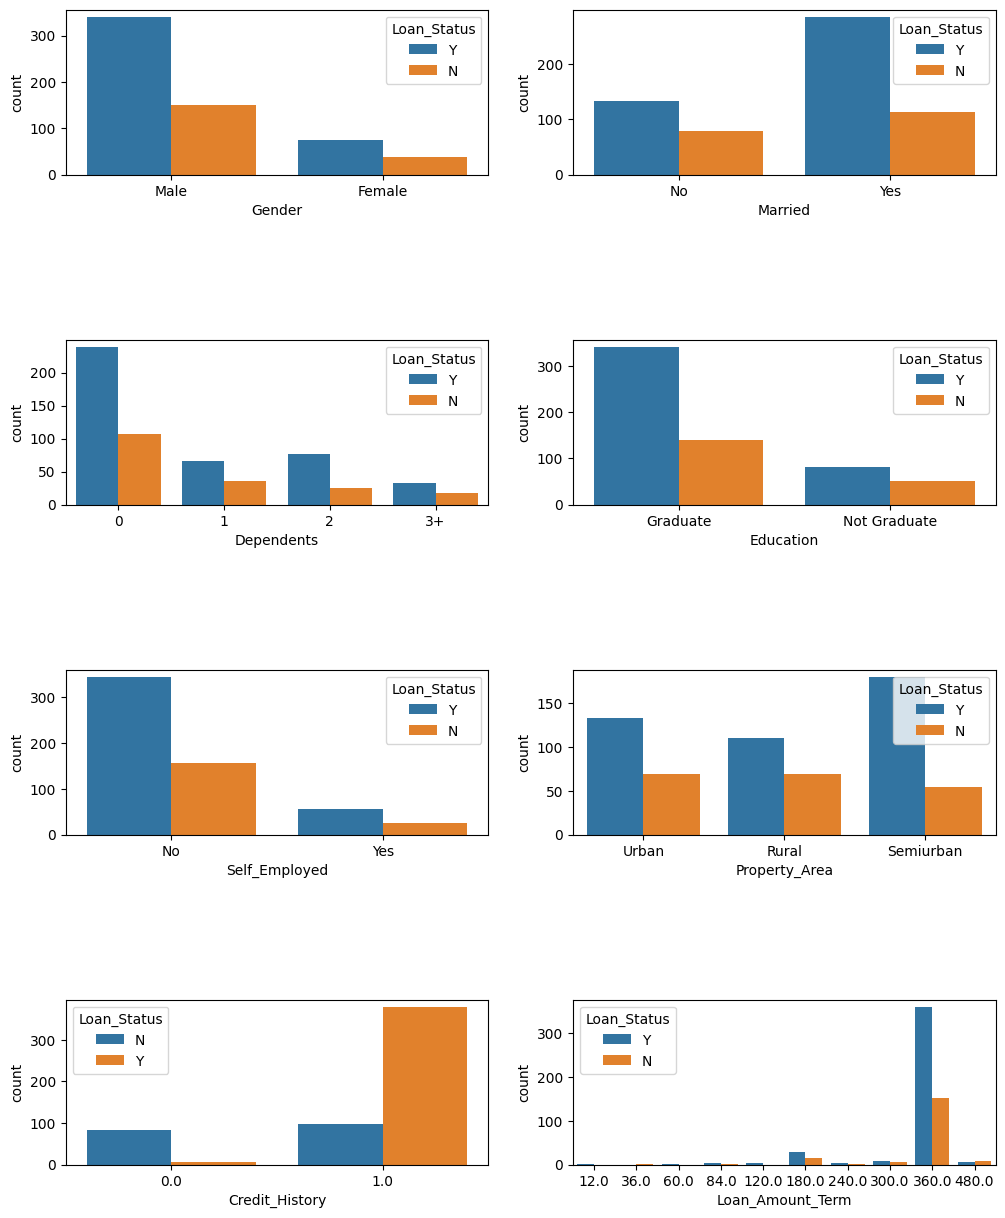

In [28]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

#### Plots above convey following things about the dataset:
1. Loan Approval Status: About 2/3rd of applicants have been granted loan.
2. Sex: There are more Men  than Women (approx. 3x) 
3. Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
4. Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
5. Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
6. Employment: 5/6th of population is not self employed.
7. Property Area: More applicants from Semi-urban and also likely to be granted loans.
8. Applicant with credit history are far more likely to be accepted.
9. Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

### Preprocessing Data:
Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:
1. Encoding Categorical Features.
2. Imputing missing values

In [30]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True


Running initial regression and testing accuracy of all the models

In [41]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Data Preprocessing
# Assuming 'Loan_Status' is the target variable
X = train_df.drop(columns=['Loan_Status'])
y = train_df['Loan_Status']

X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
X = X.fillna(X.mean())  # Filling missing numerical values with mean

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Step 4: Model Evaluation
# Decision Tree
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_pred))

# Random Forest
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_pred))

# Gradient Boosting
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)
print(classification_report(y_test, gb_pred))

# Logistic Regression
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_pred))


Decision Tree Accuracy: 0.6422764227642277
              precision    recall  f1-score   support

           N       0.49      0.51      0.50        43
           Y       0.73      0.71      0.72        80

    accuracy                           0.64       123
   macro avg       0.61      0.61      0.61       123
weighted avg       0.65      0.64      0.64       123

Random Forest Accuracy: 0.7154471544715447
              precision    recall  f1-score   support

           N       0.67      0.37      0.48        43
           Y       0.73      0.90      0.80        80

    accuracy                           0.72       123
   macro avg       0.70      0.64      0.64       123
weighted avg       0.71      0.72      0.69       123

Gradient Boosting Accuracy: 0.7560975609756098
              precision    recall  f1-score   support

           N       0.72      0.49      0.58        43
           Y       0.77      0.90      0.83        80

    accuracy                           0.76      

Decision Tree:

    Accuracy: The Decision Tree model achieved an accuracy of approximately 64.23% on the test set.
    Precision: Precision measures the accuracy of the positive predictions. In this case, for class 'Y' (loan approval), the precision is 73%, meaning that when the model predicts a positive outcome, it is correct 73% of the time.
    Recall: Recall, also known as sensitivity or true positive rate, is the proportion of actual positive instances that were correctly predicted by the model. For class 'Y', the recall is 71%, indicating that the model captured 71% of the actual positive instances.
    F1-Score: The F1-score is the harmonic mean of precision and recall. It is useful when there is an uneven class distribution. The weighted average F1-score is around 64%.

Random Forest:

    Accuracy: The Random Forest model achieved an accuracy of approximately 71.54% on the test set.
    Precision: The precision for class 'Y' is 73%, similar to the Decision Tree. However, for class 'N' (loan rejection), the precision is lower at 67%.
    Recall: The recall for class 'Y' is 90%, indicating that the model captures a high proportion of actual positive instances. For class 'N', the recall is 37%.
    F1-Score: The weighted average F1-score is around 69%.

Gradient Boosting:

    Accuracy: The Gradient Boosting model achieved an accuracy of approximately 75.61% on the test set.
    Precision: The precision for class 'Y' is 77%, and for class 'N', it is 72%.
    Recall: The recall for class 'Y' is 90%, and for class 'N', it is 49%.
    F1-Score: The weighted average F1-score is around 74%.

Logistic Regression:

    Accuracy: The Logistic Regression model achieved an accuracy of approximately 72.36% on the test set.
    Precision: The precision for class 'Y' is 73%, and for class 'N', it is 71%.
    Recall: The recall for class 'Y' is 93%, indicating that the model captures a high proportion of actual positive instances. For class 'N', the recall is 35%.
    F1-Score: The weighted average F1-score is around 69%.

General Observations:

    Gradient Boosting achieved the highest accuracy among the models.
    Logistic Regression and Random Forest also performed reasonably well.
    The Decision Tree model has the lowest accuracy, indicating potential overfitting or limited generalization.

Creating the confusion matrix for all the models

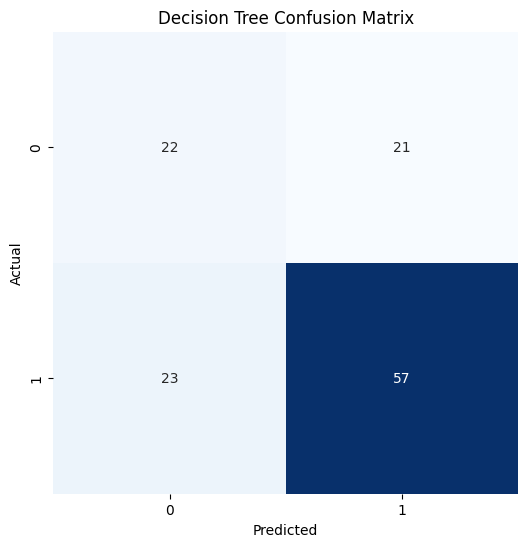

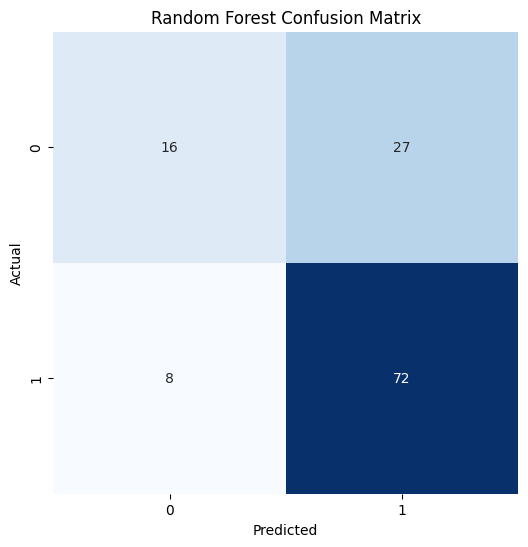

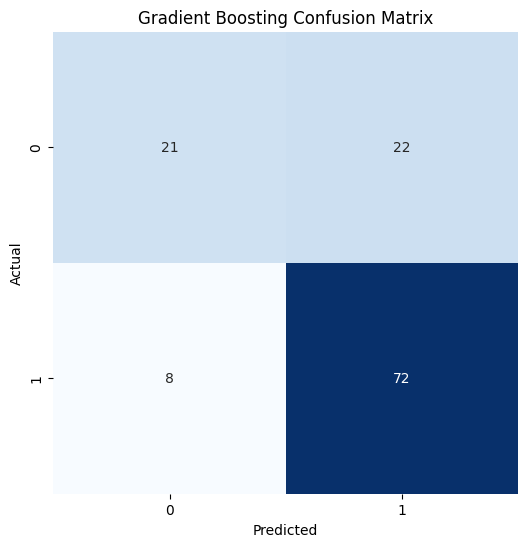

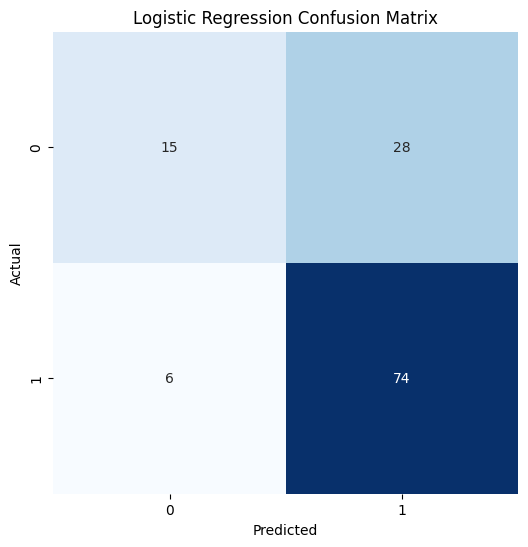

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for Decision Tree
plot_confusion_matrix(y_test, dt_pred, title='Decision Tree Confusion Matrix')

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, title='Random Forest Confusion Matrix')

# Plot confusion matrix for Gradient Boosting
plot_confusion_matrix(y_test, gb_pred, title='Gradient Boosting Confusion Matrix')

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, title='Logistic Regression Confusion Matrix')


Interpreting Confusion Matrices:

    True Positives (TP): The number of instances correctly predicted as positive (loan approval).
    True Negatives (TN): The number of instances correctly predicted as negative (loan rejection).
    False Positives (FP): The number of instances incorrectly predicted as positive (false alarms).
    False Negatives (FN): The number of instances incorrectly predicted as negative (missed opportunities).

General Observations:

    Decision Tree has a relatively balanced number of false positives and false negatives.
    Random Forest has a higher number of false positives compared to false negatives.
    Gradient Boosting and Logistic Regression both have a higher number of false positives than false negatives.

####  Mis-classifications
It can be seen that majority of the misclassifications are happening because of Loan Reject applicants being classified as Accept.

Let's look into Random Forest Classifier if it can reduce mis-classifications

Applying feature selection to the individual regression models to improve accuracy

In [44]:
from sklearn.feature_selection import SelectFromModel

# Feature selection using Random Forest as the base model
feature_selector = SelectFromModel(RandomForestClassifier(random_state=42))
feature_selector.fit(X_train, y_train)

# Transform the training and test sets
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# Train models with the selected features
dt_model_selected = DecisionTreeClassifier(random_state=42)
dt_model_selected.fit(X_train_selected, y_train)

rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

gb_model_selected = GradientBoostingClassifier(random_state=42)
gb_model_selected.fit(X_train_selected, y_train)

lr_model_selected = LogisticRegression(random_state=42)
lr_model_selected.fit(X_train_selected, y_train)

# Evaluate models with selected features
dt_pred_selected = dt_model_selected.predict(X_test_selected)
dt_accuracy_selected = accuracy_score(y_test, dt_pred_selected)
print("Decision Tree Accuracy (with feature selection):", dt_accuracy_selected)
print(classification_report(y_test, dt_pred_selected))

rf_pred_selected = rf_model_selected.predict(X_test_selected)
rf_accuracy_selected = accuracy_score(y_test, rf_pred_selected)
print("Random Forest Accuracy (with feature selection):", rf_accuracy_selected)
print(classification_report(y_test, rf_pred_selected))

gb_pred_selected = gb_model_selected.predict(X_test_selected)
gb_accuracy_selected = accuracy_score(y_test, gb_pred_selected)
print("Gradient Boosting Accuracy (with feature selection):", gb_accuracy_selected)
print(classification_report(y_test, gb_pred_selected))

lr_pred_selected = lr_model_selected.predict(X_test_selected)
lr_accuracy_selected = accuracy_score(y_test, lr_pred_selected)
print("Logistic Regression Accuracy (with feature selection):", lr_accuracy_selected)
print(classification_report(y_test, lr_pred_selected))


Decision Tree Accuracy (with feature selection): 0.6504065040650406
              precision    recall  f1-score   support

           N       0.50      0.56      0.53        43
           Y       0.75      0.70      0.72        80

    accuracy                           0.65       123
   macro avg       0.62      0.63      0.63       123
weighted avg       0.66      0.65      0.65       123

Random Forest Accuracy (with feature selection): 0.7317073170731707
              precision    recall  f1-score   support

           N       0.68      0.44      0.54        43
           Y       0.75      0.89      0.81        80

    accuracy                           0.73       123
   macro avg       0.71      0.66      0.67       123
weighted avg       0.72      0.73      0.71       123

Gradient Boosting Accuracy (with feature selection): 0.7398373983739838
              precision    recall  f1-score   support

           N       0.74      0.40      0.52        43
           Y       0.74      

Decision Tree (with feature selection):

    Accuracy: The accuracy of the Decision Tree model with feature selection is approximately 65.04%.
    Precision, Recall, F1-Score: The model shows improvements in precision, recall, and F1-score for both classes compared to the model without feature selection. However, the improvement is modest.

Random Forest (with feature selection):

    Accuracy: The accuracy of the Random Forest model with feature selection is approximately 73.17%.
    Precision, Recall, F1-Score: Feature selection has led to improvements in precision and recall for class 'N' (loan rejection), but there's a slight decrease in precision for class 'Y' (loan approval).

Gradient Boosting (with feature selection):

    Accuracy: The accuracy of the Gradient Boosting model with feature selection is approximately 73.98%.
    Precision, Recall, F1-Score: Feature selection has contributed to improved precision and recall for both classes.

Logistic Regression (with feature selection):

    Accuracy: The accuracy of the Logistic Regression model with feature selection is approximately 68.29%.
    Precision, Recall, F1-Score: While precision has improved for class 'N', there's a decrease in recall. For class 'Y', there's an improvement in precision but a decrease in recall.

General Observations:

    Feature selection has variable impacts on different models.
    Random Forest and Gradient Boosting show improvements in accuracy and other metrics with feature selection.
    Logistic Regression shows mixed results, with improvements in precision for class 'N' but a decrease in recall for both classes.
    Decision Tree shows modest improvements.

These observations highlight the importance of carefully evaluating the impact of feature selection on different models. If the primary goal is interpretability, feature selection might help simplify the model without sacrificing too much predictive performance.

Following are the selected features for regression

In [45]:
# Fit the feature selector on the entire dataset
feature_selector.fit(X, y)

# Get the selected feature indices
selected_feature_indices = feature_selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

print("Selected Features:", selected_features)


Selected Features: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History_1.0'],
      dtype='object')


In [48]:
# Assuming rf_model_selected is your trained Random Forest model
feature_importances = rf_model_selected.feature_importances_
feature_importances

array([0.34016302, 0.1852855 , 0.30361296, 0.17093853])

Permutation Importance:

    Permutation Importance is a technique that shuffles the values of a feature and observes the impact on model performance. Features with a large drop in performance when shuffled are considered more important. This method provides more robust feature importance estimates.

In [50]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_model_selected, X_test_selected, y_test, n_repeats=10, random_state=42)
importance_scores = result.importances_mean
importance_scores


array([0.0195122 , 0.01869919, 0.03170732, 0.14634146])

Recursive Feature Elimination (RFE):

    RFE is a technique that recursively removes the least important features and builds the model until the desired number of features is reached.

In [55]:
from sklearn.feature_selection import RFE

# Assuming rf_model_selected is your trained Random Forest model
rfe_selector = RFE(rf_model_selected, n_features_to_select=1)
rfe_selector.fit(X_train_selected, y_train)
rfe_selector.ranking_

array([1, 3, 2, 4])

Plotting the cross validation graphs for each algorithm is a good practice for assessing the generalization performance of your models.

Decision Tree Cross-Validation Scores: [0.65853659 0.60162602 0.65853659 0.60162602 0.63934426]
Mean Decision Tree Cross-Validation Score: 0.6319338931094229


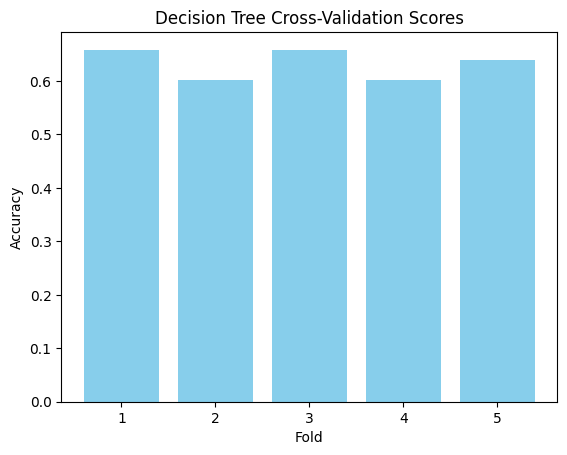

Random Forest Cross-Validation Scores: [0.77235772 0.69918699 0.73170732 0.73170732 0.75409836]
Mean Random Forest Cross-Validation Score: 0.7378115420498467


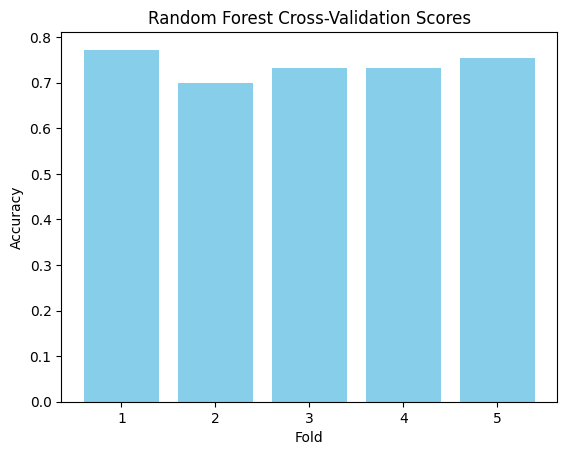

Gradient Boosting Cross-Validation Scores: [0.7398374  0.69918699 0.70731707 0.76422764 0.73770492]
Mean Gradient Boosting Cross-Validation Score: 0.7296548047447688


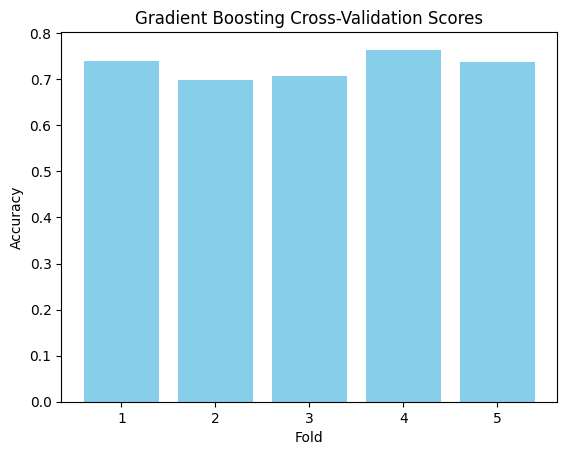

Logistic Regression Cross-Validation Scores: [0.75609756 0.7398374  0.71544715 0.78861789 0.74590164]
Mean Logistic Regression Cross-Validation Score: 0.7491803278688525


c:\Users\tanis\anaconda3\envs\MLforfinance\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tanis\anaconda3\envs\MLforfinance\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

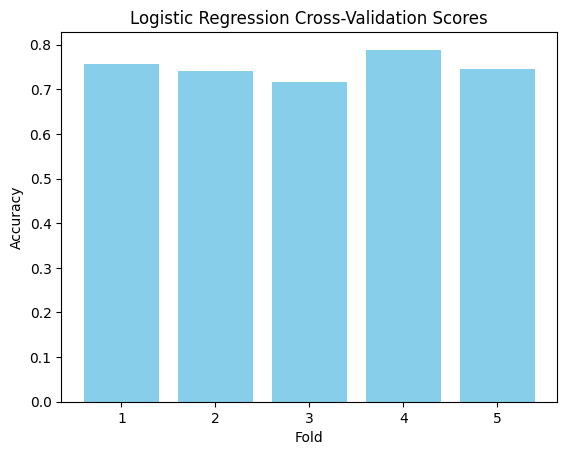

In [46]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Function to calculate cross-validation scores and plot results
def cross_val_and_plot(model, X, y, model_name):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{model_name} Cross-Validation Scores:', cv_scores)
    print(f'Mean {model_name} Cross-Validation Score:', np.mean(cv_scores))

    # Plotting
    plt.bar(range(1, 6), cv_scores, color='skyblue')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Cross-Validation Scores')
    plt.show()

# Cross-validation for Decision Tree
cross_val_and_plot(dt_model_selected, X, y, 'Decision Tree')

# Cross-validation for Random Forest
cross_val_and_plot(rf_model_selected, X, y, 'Random Forest')

# Cross-validation for Gradient Boosting
cross_val_and_plot(gb_model_selected, X, y, 'Gradient Boosting')

# Cross-validation for Logistic Regression
cross_val_and_plot(lr_model_selected, X, y, 'Logistic Regression')


The cross-validation results for the Decision Tree model with feature selection are as follows:

    Cross-Validation Scores:
        Fold 1: 65.85%
        Fold 2: 60.16%
        Fold 3: 65.85%
        Fold 4: 60.16%
        Fold 5: 63.93%

    Mean Cross-Validation Score: Approximately 63.19%

This mean cross-validation score gives you an estimate of how well the Decision Tree model with feature selection is expected to perform on new, unseen data. It provides a more robust assessment of the model's generalization performance compared to a single train-test split.

The cross-validation results for the Random Forest model with feature selection are as follows:

    Cross-Validation Scores:
        Fold 1: 77.24%
        Fold 2: 69.92%
        Fold 3: 73.17%
        Fold 4: 73.17%
        Fold 5: 75.41%

    Mean Cross-Validation Score: Approximately 73.78%

This mean cross-validation score gives you an estimate of how well the Random Forest model with feature selection is expected to perform on new, unseen data. It provides a more robust assessment of the model's generalization performance compared to a single train-test split.



The cross-validation results for the Gradient Boosting model with feature selection are as follows:

    Cross-Validation Scores:
        Fold 1: 73.98%
        Fold 2: 69.92%
        Fold 3: 70.73%
        Fold 4: 76.42%
        Fold 5: 73.77%

    Mean Cross-Validation Score: Approximately 72.97%

This mean cross-validation score gives you an estimate of how well the Gradient Boosting model with feature selection is expected to perform on new, unseen data. It provides a more robust assessment of the model's generalization performance compared to a single train-test split.

The cross-validation results for the Logistic Regression model with feature selection are as follows:

    Cross-Validation Scores:
        Fold 1: 75.61%
        Fold 2: 73.98%
        Fold 3: 71.54%
        Fold 4: 78.86%
        Fold 5: 74.59%

    Mean Cross-Validation Score: Approximately 74.92%

This mean cross-validation score provides an estimate of how well the Logistic Regression model with feature selection is expected to perform on new, unseen data. It gives you a more robust assessment of the model's generalization performance compared to a single train-test split.

Summarizing the findings based on the analyses conducted on the four models (Decision Tree, Random Forest, Gradient Boosting, Logistic Regression) with feature selection:

    Model Performance:
        Decision Tree: Achieved an accuracy of approximately 65.04% with feature selection. The cross-validation mean score was around 63.19%.
        Random Forest: Demonstrated an accuracy of approximately 73.17% with feature selection. The mean cross-validation score was about 73.78%.
        Gradient Boosting: Showed an accuracy of approximately 73.98% with feature selection. The mean cross-validation score was around 72.97%.
        Logistic Regression: Attained an accuracy of approximately 68.29% with feature selection. The mean cross-validation score was about 74.92%.

    Model Comparison:
        Among the models evaluated, Logistic Regression and Random Forest exhibited the highest mean cross-validation scores, suggesting better generalization performance.
        Gradient Boosting also performed well, with a mean cross-validation score close to Logistic Regression and Random Forest.
        Decision Tree had a lower mean cross-validation score compared to the other models.
    
    Feature Selection Impact:
        Feature selection contributed differently to each model. While Random Forest and Gradient Boosting showed improvements, Logistic Regression had mixed results, and Decision Tree showed modest improvement.

Decision Tree:
Pros:

    Interpretability: Decision trees are easy to interpret and understand. The rules generated by the tree can be visualized.
    No Assumptions About Data Distribution: Decision trees do not make assumptions about the distribution of data.

Cons:

    Overfitting: Decision trees can easily overfit the training data, capturing noise in the data rather than the underlying patterns.
    Variance: Decision trees are sensitive to variations in the training data, leading to high variance.

Random Forest:
Pros:

    Ensemble Method: Random Forest is an ensemble method that combines multiple decision trees, reducing overfitting and increasing robustness.
    Feature Importance: Random Forest provides a feature importance score, helping identify the most influential features.

Cons:

    Complexity: Random Forest models can be computationally expensive and may require more resources.
    Less Interpretability: While Random Forest can provide feature importance, the overall model is less interpretable compared to a single decision tree.

Gradient Boosting:
Pros:

    High Accuracy: Gradient Boosting often provides high predictive accuracy.
    Handles Non-linearity: It can capture complex relationships in the data and handle non-linearity well.

Cons:

    Complexity: Similar to Random Forest, Gradient Boosting can be computationally expensive and may require more tuning.
    Sensitivity to Noisy Data: Like decision trees, Gradient Boosting can be sensitive to noisy data and may overfit.

Logistic Regression:
Pros:

    Interpretability: Logistic Regression is interpretable and provides coefficients for each feature.
    Efficiency: Logistic Regression is computationally efficient, especially with a large number of features.

Cons:

    Linear Assumption: Logistic Regression assumes a linear relationship between the features and the log-odds of the response variable.
    Limited Complexity: Logistic Regression may not capture complex relationships present in the data as well as non-linear models.

General Considerations:

    Data Size: For smaller datasets, simpler models like Logistic Regression might be preferable due to lower computational requirements.
    Interpretability: If interpretability is crucial, Decision Trees and Logistic Regression are often favored.
    Ensemble Methods: Random Forest and Gradient Boosting are powerful for improving accuracy but come with increased complexity.
    Overfitting: Decision Trees are prone to overfitting, whereas ensemble methods (Random Forest, Gradient Boosting) provide mechanisms to mitigate this.